In [0]:
# Convolutional Neural Network (CNN)
# Train Data
# Validate Data
# Test Data
# Yunus Emre Ak

# Ek not: X, Y matriksi temsil etmektedir.

In [2]:
# Matematiksel işlemler için gerekli kütüphane
import numpy as np

# Çizim işlemleri için gerekli kütüphane
import matplotlib.pyplot as plt

# Neural Network için gerekli kütüphaneler
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical

# Convolutional Neural Networks için gerekli ek kütüphaneler
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Dropout
from keras.layers import Flatten

# Model'i görselleştirmek için ek kütüphane
from keras.models import Model

# Rastgele için gerekli kütüphane
import random

Using TensorFlow backend.


In [0]:
# Rastgeleliyi sabit kılma (her derleme aynı gelmesini sağlama)
np.random.seed(0)

In [4]:
# 60.000 resim train'e eklenecek 
# 10.000 resim test'e eklenecek
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# Boyutları gösterme
print("X-Train: ", X_train.shape)
print("X-Test: ", X_test.shape)
print("Y-Train: ", Y_train.shape[0])
print("Y-Test: ", Y_test.shape[0])

X-Train:  (60000, 28, 28)
X-Test:  (10000, 28, 28)
Y-Train:  60000
Y-Test:  10000


In [0]:
# Debug için
# Eğer içindeki koşul sağlanmazsa hata mesajı gösterir durur
assert(X_train.shape[0] == Y_train.shape[0]), "Resimlerin sayısı etiketlerin sayısında eşit değildir."
assert(X_test.shape[0] == Y_test.shape[0]), "Resimlerin sayısı etiketlerin sayısında eşit değildir."
assert(X_train.shape[1:] == (28, 28)), "Resimlerin boyutu 28x28 olmak zorundadır."
assert(X_test.shape[1:] == (28, 28)), "Resimlerin boyutu 28x28 olmak zorundadır."

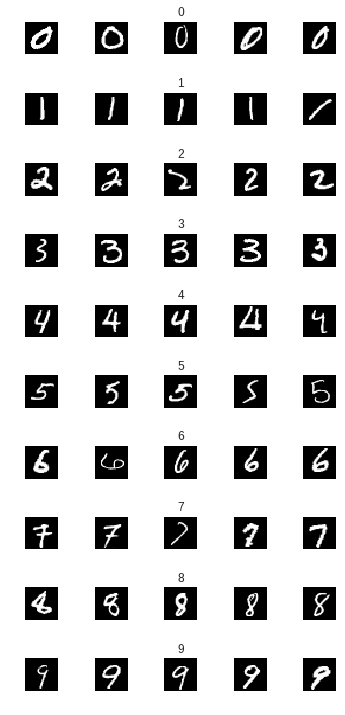

In [6]:
# Numunelerin sayısı
n_samples = []

# Gösterilmek istenen sütun
cols = 5
# 0, ..., 9 a kadar 10 çıktı var
n_classes = 10

# Bir örnekte birden fazla alan gösterme
fig, axs = plt.subplots(nrows=n_classes, ncols=cols, figsize=(5, 10))
# Plot'ların bitişik olmasını engelleme araya boşluk ekleme
fig.tight_layout()

# Tekrarlama yapısı
for i in range(cols):
    for j in range(n_classes):
        # Her bir sayı için girilen inputları alma
        X_selected = X_train[Y_train == j]
        # Girilen inputları ekrana gri olarak çizgirme
        axs[j][i].imshow(X_selected [random.randint(0, len(X_selected) - 1), :, :], cmap=plt.get_cmap("gray"))
        # Koordinat sistemini kapatma
        axs[j][i].axis("off")
        
        # Ortadaki verileri örnek olarak alacağız
        if i == 2:
            # Çizimin üstüne başlık koyma
            axs[j][i].set_title(str(j))
            # Seçili olanların sayısını saklama
            n_samples.append(len(X_selected))

Text(0,0.5,'Resim sayısı')

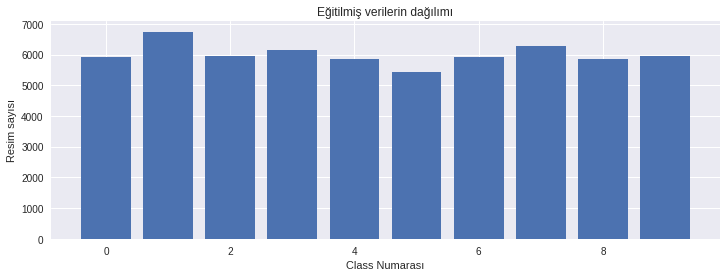

In [7]:
# print(n_samples)

# Veri dağılımını grafikte gösterme

# Çizim boyutunu ayarlama
plt.figure(figsize=(12, 4))

# Grafik çizimi yapma
plt.bar(range(0, n_classes), n_samples)

# Çizime başlık ayarlama
plt.title("Eğitilmiş verilerin dağılımı")

# Etiketleri ayarlama
plt.xlabel("Class Numarası")
plt.ylabel("Resim sayısı")

In [0]:
# Derinlik değeri ekliyoruz. Gray-Scale Olduğu için 1 (RGB olsaydı 3)
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [0]:
# 10 tane sayı var
Y_train = to_categorical(Y_train, 10)
Y_test = to_categorical(Y_test, 10)

In [0]:
# Normalization İşlemi (0, 1 arasına alma işlemlerde kolaylık sağlayacaktır)
X_train = X_train / 255
X_test = X_test / 255

In [0]:
 # LeNet Modal Fonksiyonunu tanımılama
def leNet_modal():
  # Model oluşturma
  model = Sequential()
  
  # Convolutional Neural Nerwork (CNN) Layer (katman) Ekleme
  # Feature Map (özellik haritası) oluşturur.
  # Ne kadar filtre olacak (30 ideal, fazla olursa bilgisayarı yorar)
  # Filtre boyutu
  # Input boyutu
  # Activator fonksiyonu
  # İsteğe bağlı ayarlar (Önemlidir)
  # Strides: Filterenin hareket boyutu. Büyük olursa çıktı ufak olur. default: 1er 1er ilerler.
  # Padding: Valid-Casual-Same default: Kullanma
  # Padding-Same: Girdi ile çıktı aynı boyutta olur. (Girdi 0 verileri ile genişletiilir) 
  model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation="relu"))
  
  # Pooling Layer ekleme
  # Feature Map (özellik haritası) üzerinden olan en yüksek değeri ele alır.
  # pool_size: Gerekli bilgileri kaybetmeyecek kadar büyük, daha etkili inceleyecek kadar küçük olmalı.
  model.add(MaxPooling2D(pool_size=(2, 2)))
  
  # CNN Layer ekleme
  # İlk katman olmadığı için input_shape olmaz.
  model.add(Conv2D(15, (3,3), activation="relu"))
  
  # Pooling Layer ekleme
  model.add(MaxPooling2D(pool_size=(2, 2)))
  
  # Flatten Layer ekleme
  # 1D diziye çevirme
  model.add(Flatten())
  
  # Hidden Layer oluşturma
  # Az olursa verimli olmaz, çok olursa sistemi zorlar. İdeal 500
  model.add(Dense(500, activation="relu"))
  
  
  # Dropout Layer ekleme (Overfitting durumunu engellemek için)
  # Not: Bu katman parametresi çok olan katmandan sonra eklenir. Çok parametre = Çok overfitting ihtimali
  # Fraction Rate: 0-no node 1-all node (0.5 önerilen)
  model.add(Dropout(0.5))
  
  # Output Layer ekleme
  # n_classes: Label sayısı (Yukarıda tanımlanan)
  model.add(Dense(n_classes, activation="softmax"))
  
  # Modeli en iyilemek (optimize)
  model.compile(Adam(lr=0.01), loss="categorical_crossentropy", metrics=['accuracy'])
  
  return model;

In [12]:
# Lenet modelini oluşturma
model = leNet_modal()

# Modelin özetini ekrana yazdırma
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 15)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 375)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               188000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 500)               0         
__________

In [13]:
# Modeli çalıştırma
history = model.fit(X_train, Y_train, epochs=10, validation_split=0.1, batch_size=400, verbose=1, shuffle=1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 4s 69us/step - loss: 0.2446 - acc: 0.9216 - val_loss: 0.0486 - val_acc: 0.9845
Epoch 2/10
54000/54000 [==============================] - 2s 38us/step - loss: 0.0680 - acc: 0.9791 - val_loss: 0.0378 - val_acc: 0.9883
Epoch 3/10
54000/54000 [==============================] - 2s 37us/step - loss: 0.0577 - acc: 0.9820 - val_loss: 0.0405 - val_acc: 0.9880
Epoch 4/10
54000/54000 [==============================] - 2s 37us/step - loss: 0.0510 - acc: 0.9842 - val_loss: 0.0439 - val_acc: 0.9883
Epoch 5/10
54000/54000 [==============================] - 2s 37us/step - loss: 0.0438 - acc: 0.9867 - val_loss: 0.0390 - val_acc: 0.9893
Epoch 6/10
54000/54000 [==============================] - 2s 37us/step - loss: 0.0416 - acc: 0.9871 - val_loss: 0.0320 - val_acc: 0.9902
Epoch 7/10
54000/54000 [==============================] - 2s 37us/step - loss: 0.0362 - acc: 0.9889 - val_loss: 0.0362 - val_acc:

Text(0.5,0,'epoch (devir)')

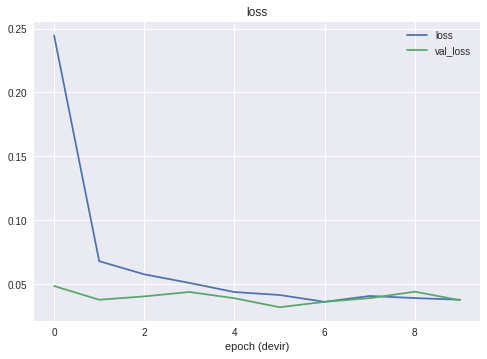

In [14]:
# Kayıpların grafiği
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('loss')
plt.xlabel('epoch (devir)')

Text(0.5,0,'epoch (devir)')

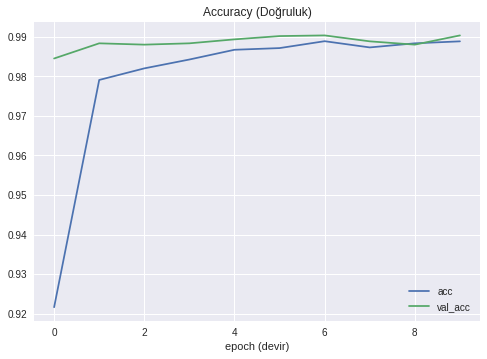

In [15]:
# Doğruluğun grafiği
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc', 'val_acc'])
plt.title('Accuracy (Doğruluk)')
plt.xlabel('epoch (devir)')

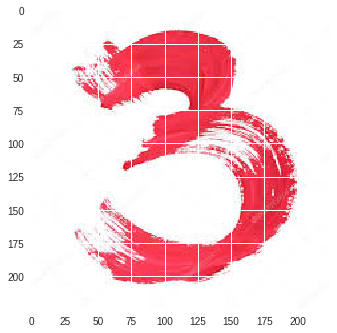

In [16]:
# Resim isteğinde bulunma
import requests
from PIL import Image

# Url'e istek yapıp yanıtı alma
url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcST8KzXHtkSHcxzdpnllMhAj0upLEwnNFdtY6j4YUPcmaf4Ty3u'
response = requests.get(url, stream=True)
img = Image.open(response.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

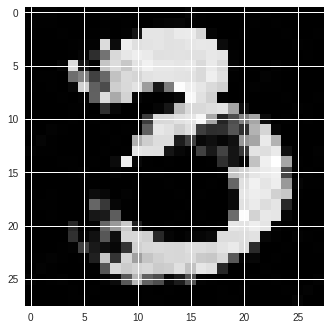

In [17]:
# OpenCV
import cv2

# Resmi diziye çevirme
img = np.asarray(img)

# Resmi inputlarla aynı boyuta getirme
img = cv2.resize(img, (28, 28))

# Siyah-Beyaz Yapma
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Resmin tersini alma (255'ten çıkarma)
img = cv2.bitwise_not(img)

# Resmi gösterme
plt.imshow(img, cmap=plt.get_cmap("gray"))

In [0]:
# Normalization (0-1 arasında işlemler daha hızlı olur. e^1)
img = img / 255

# Resmin boyutunu ayarlama
img = img.reshape(1, 28, 28, 1)

In [19]:
# Öngörüyü test etme
prediction = model.predict_classes(img)
print("Öngörüm: ", str(prediction))

Öngörüm:  [3]


In [20]:
# Skoru hesaplama
score = model.evaluate(X_test, Y_test, verbose=1)

print(type(score))
print("Test Skoru: ", score[0])
print("Test Doğruluğu: ", score[1])

10000/10000 [==============================] - 1s 73us/step
<class 'list'>
Test Skoru:  0.03423049192543035
Test Doğruluğu:  0.9902


## Ara işlemleri görselleştirme



```
Layer (type)                 Output Shape              Param #   
=================================================================
conv2d_1 (Conv2D)            (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 15)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 375)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               188000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5010      
=================================================================
Total params: 197,855
Trainable params: 197,855
Non-trainable params: 0
_________________________________________________________________
None
```



In [21]:
# Katmanlar

# 0. çıktıyı yani conv2d_1'i alma
layer1 = Model(inputs=model.layers[0].input, outputs=model.layers[0].output)

# 2. çıktıyı yani conv2d_2'yi alma
layer2 = Model(inputs=model.layers[0].input, outputs=model.layers[2].output)

visual_layer1, visual_layer2 = layer1.predict(img), layer2.predict(img)
print(visual_layer1.shape)
print(visual_layer2.shape)

(1, 24, 24, 30)
(1, 10, 10, 15)


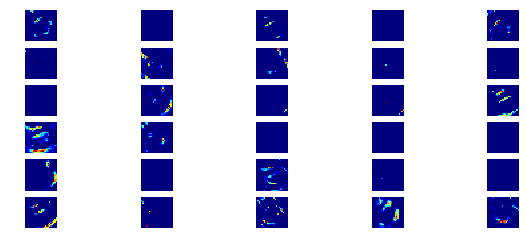

In [22]:
plt.figure(figsize=(10, 4))

# Derinliği 30 olduğundan dolayı
for i in range(30):
  # 6x5 = 30
  plt.subplot(6, 5, i+1)
  plt.imshow(visual_layer1[0, :, :, i], cmap=plt.get_cmap("jet"))
  plt.axis('off')

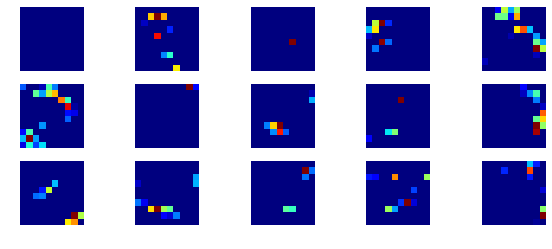

In [23]:
plt.figure(figsize=(10, 4))

# Derinliği 15 olduğundan dolayı
for i in range(15):
  plt.subplot(3, 5, i+1)
  plt.imshow(visual_layer2[0, :, :, i], cmap=plt.get_cmap("jet"))
  plt.axis('off')